In [1]:
import pandas as pd
import os
import requests
from dotenv import load_dotenv
import alpaca_trade_api as tradeapi

load_dotenv()

True

In [2]:
# WELCOME TO THE FUTURE
# Before getting into predicting the future, let's recap what has been learned already.
# Using APIs and statistical functions, you can now make short-term predictions about stock performance.
# You can also measure uncertain outcomes.
# But you still need to figure out two issues:
    # First, as we try to predict further into the future, measuring the potential performance of an asset becomes more difficult.
    # Second, quantifying the long-term future  performance of numerous assets proves challenging.
    # This is because each asset has its own range of possible outcomes, which complicates the analysis.
# Fortunately, tools exist to account for variations in the performance of a portfolio. 
# One such tool is the MONTE CARLO SIMULATION. 
# Analysts use this tool to generate a range of possible outcomes for a portfolio with a high degree of confidence.
# In this lesson, you'll run Monte Carlo simulations to forecast the long-term performance of both individual stocks and a portfolio.
# Being able to predict the future in this way will give you an edge as a FinTech professional and as a financial analyst.

In [3]:
# PREDICTING THE FUTURE WITH MONTE CARLO SIMULATIONS
# When we analyze financial data, we typically summarize historical data to predict future outcomes.
# However, these predictions become less accurate the further we project into the future or the more assets that we analyze.
# As the scope of the analysis widens, the chance for randomness and variability increases.
# A SIMULATION is a running instance of a model, or computer program, that imitates an existing process or system.
# With simulations, analysts can examine the possible outcomes of real-world scenarios in an environment that's safe and efficient.
# For example, examining the future performance of a stock in a simulation means that no one loses any real money.
# Analysts can also change important variables that influence a simulations results such as:
    # 1. Economic Conditions
    # 2. Overall Market Performance
    # 3. Length of Time
# Monte Carlo simulations are designed to solve issues with predicting future outcomes by modeling effects of uncertainty over time.
# People can use Monte Carlo simulations to predict outcomes across industries.
# However, they'll prove particularly useful for you as a FinTech professional for forecasting portfolio performance.
# To build and analyze these models, we need to apply the concepts of probability distribution and portfolio forecasting. 
# We already covered probability distribution, so let's find out more about portfolio forecasting.

In [4]:
# ON THE JOB
# In computer programming, an INSTANCE refers to an occurance of a running program.
# For example, running a Monte Carlo instance means the same thing as running a Monte Carlo simulation.

In [5]:
# WHAT'S PORTFOLIO FORECASTING?
# PORTFOLIO FORECASTING is the process of simulating the future performance of a portfolio and trying to analyze its most probable outcome.
# In this lesson, you'll estimate the range of potential cumulative returns for a portfolio and the corresponding probabilities.
# This will help you analyze the potential of the portfolio's performance to deviate from the expected result.
# Many professionals across the fintech industry use portfolio forcasting.
# Portfolio managers, quantitative analysts, and retirement planners are just some of the people who need to forecast the future performance of a portfolio to gauge its potential risk of investment.
# We can use Monte Carlo simulations to project the future performance of any portfolio - be it stocks, bonds, crypto, or other commodities - as long as the historical price data can be retrieved.

In [6]:
# IMPLEMENTING MONTE CARLO SIMULATIONS IN PYTHON
# To simulate portfolio performance using Monte Carlo and Python, we need the following:
    # 1. Historical pricing data for the assets in the portfolio, which the simulation uses to generate its predictions.
    # 2. A simulation framework in which to run the Monte Carlo simulation.
# We can ge thte historical data one of two ways:
    # 1. We can read a CSV file into a Pandas DataFrame using the `pd.read_csv` function.
    # 2. Make an API call using Alpaca or any other API of your choice.
# In this lesson, we'll use the Alpaca SDK to make an Alpaca API call to get the historical data we need.
# For the Monte Carlo simulation framework, you'll use the Python library called `MCForecastTools`.
# Unlike other libraries, this one isn;t part of the conda dev environment.
# Rather, it exists as a Python file named `MCForecastTools.py`, in the same folder as the Jupyter notebook you're working in.
# This file contains all the logic, in the form of Python code, that you need to run the MC sim.
# We need to import `MCForecastTools.py` into the notebook in order to access and run the simulations.

In [7]:
# GET HISTORICAL DATA WITH THE ALPACA API
# For this MC sim, we'll use NVO and NVDA.
# If we invest $10,000 in these stocks today, how much will our portfolio be worth in 5 years or even in 10?
# To estimate what the value of a portfolio will be in 3 years, we'll get 3 years of historical price data.
# To do this, we'll make an API call to Alpaca via its SDK.

# Set the Alpaca API and Secret Keys:
alpaca_api_key = os.getenv('APCA_API_KEY_ID')
alpaca_secret_key = os.getenv('APCA_API_SECRET_KEY')

# Create the Alpaca REST object:
alpaca = tradeapi.REST(
    alpaca_api_key,
    alpaca_secret_key,
    api_version = 'v2'
)

# Set the tickers for NVO and NVDA:
tickers = ['NVO', 'NVDA', 'SPY']

# Get four years of NVO and NVDA stock data:
start_date = pd.Timestamp('2018-12-08', tz='America/New_York').isoformat()
end_date = pd.Timestamp('2023-12-08', tz='America/New_York').isoformat()

# Create a timeframe of '1Day':
timeframe = '1Day'

# Create the Alpaca object DataFrame using the `get_bars` function:
stock_prices_df = alpaca.get_bars(
    tickers,
    timeframe,
    start=start_date,
    end=end_date
).df

# Reorganize the DataFrame and separate the ticker data:
NVO = stock_prices_df[stock_prices_df['symbol']=='NVO'].drop('symbol', axis=1)
NVDA = stock_prices_df[stock_prices_df['symbol']=='NVDA'].drop('symbol', axis=1)
SPX = stock_prices_df[stock_prices_df['symbol']=='SPY'].drop('symbol', axis=1)

# Concatenate the ticker DataFrames
stock_prices_df = pd.concat([NVO, NVDA, SPX], axis=1, keys=['NVO', 'NVDA', 'SPY'])

# Review the first and last 5 rows of the DataFrames:
display(stock_prices_df.head())
display(stock_prices_df.tail())

NVO                                               \
                           close    high      low trade_count   open   volume   
timestamp                                                                       
2018-12-10 05:00:00+00:00  45.95  46.250  45.3400       11679  46.23  1406440   
2018-12-11 05:00:00+00:00  45.20  46.030  44.7600       13023  45.96  1827109   
2018-12-12 05:00:00+00:00  46.01  46.335  45.7000       12137  45.72  2043306   
2018-12-13 05:00:00+00:00  46.77  46.880  45.9100       14667  45.92  2716864   
2018-12-14 05:00:00+00:00  46.50  46.920  46.3375       16276  46.42  3017815   

                                        NVDA                    ...          \
                                vwap   close      high     low  ...    open   
timestamp                                                       ...           
2018-12-10 05:00:00+00:00  45.884776  151.86  152.8599  145.65  ...  145.80   
2018-12-11 05:00:00+00:00  45.322086  148.19  155.8900  145.00  ...  155.56   
2018-12-12 05:00:00+00:00  46.055270  148.90  152.7800  144.82  ...  148.42   
2018-12-13 05:00:00+00:00  46.569347  148.89  153.3800  147.44  ...  150.79   
2018-12-14 05:00:00+00:00  46.588727  146.45  150.5900  145.50  ...  147.21   

                                                    SPY                    \
                             volume        vwap   close      high     low   
timestamp                                                                   
2018-12-10 05:00:00+00:00  16290616  150.798270  264.07  265.1613  258.62   
2018-12-11 05:00:00+00:00  17301360  149.779707  264.11  267.8700  262.48   
2018-12-12 05:00:00+00:00  16841154  149.585778  265.53  269.0000  265.37   
2018-12-13 05:00:00+00:00  12087713  149.766917  265.38  267.4900  264.12   
2018-12-14 05:00:00+00:00  12407625  147.811020  260.57  264.0300  259.85   

                                                                      
                          trade_count    open     volume        vwap  
timestamp                                                             
2018-12-10 05:00:00+00:00      937170  263.37  153231653  262.218801  
2018-12-11 05:00:00+00:00      659380  267.66  123751607  265.214857  
2018-12-12 05:00:00+00:00      512840  267.47   99519604  266.924560  
2018-12-13 05:00:00+00:00      489986  266.52   97977658  265.525118  
2018-12-14 05:00:00+00:00      616884  262.96  118649525  261.656182  

[5 rows x 21 columns]

NVO                                        \
                            close     high      low trade_count    open   
timestamp                                                                 
2023-12-04 05:00:00+00:00  100.92  101.145  99.5800       43191  100.57   
2023-12-05 05:00:00+00:00   99.63   99.880  98.9100       42909   99.37   
2023-12-06 05:00:00+00:00   97.59   99.260  97.5900       44888   99.25   
2023-12-07 05:00:00+00:00   96.81   97.300  95.7376       49531   97.28   
2023-12-08 05:00:00+00:00   96.64   97.050  96.2150       45519   96.40   

                                                  NVDA                    ...  \
                            volume        vwap   close      high     low  ...   
timestamp                                                                 ...   
2023-12-04 05:00:00+00:00  2987971  100.526565  455.10  460.7700  450.10  ...   
2023-12-05 05:00:00+00:00  2846023   99.506876  465.66  466.0000  452.71  ...   
2023-12-06 05:00:00+00:00  3082060   98.229447  455.03  473.8700  454.12  ...   
2023-12-07 05:00:00+00:00  3424834   96.473171  465.96  466.2900  456.04  ...   
2023-12-08 05:00:00+00:00  3599388   96.640248  475.06  477.4085  465.50  ...   

                                                             SPY            \
                              open    volume        vwap   close      high   
timestamp                                                                    
2023-12-04 05:00:00+00:00  460.770  43768195  454.363449  456.69  459.1206   
2023-12-05 05:00:00+00:00  454.660  37193879  461.558618  456.60  457.5900   
2023-12-06 05:00:00+00:00  472.145  38077359  462.355275  454.76  458.8400   
2023-12-07 05:00:00+00:00  457.000  35096168  462.735931  458.23  458.9000   
2023-12-08 05:00:00+00:00  465.950  35893498  473.925785  460.20  460.7450   

                                                                             
                              low trade_count    open    volume        vwap  
timestamp                                                                    
2023-12-04 05:00:00+00:00  454.34      538575  455.60  72431488  456.190940  
2023-12-05 05:00:00+00:00  454.87      483242  455.26  69793569  456.319673  
2023-12-06 05:00:00+00:00  454.31      465901  458.81  69124885  456.130868  
2023-12-07 05:00:00+00:00  456.29      458079  456.91  67002346  457.663703  
2023-12-08 05:00:00+00:00  457.21      524786  457.46  83124965  459.278999  

[5 rows x 21 columns]

In [8]:
# IMPORTANT
# The `Unsolved` folder for each activtity in this lesson and the Challenge assignment folder include the MCForecastTools library as a Python file.
# To access this library, you import it into the Jupyter notebook where you'll run your simulation.

In [9]:
# BUILD A MONTE CARLO SIMULATION
# The `MCSimulation` module contains multiple functions and parameters that help us configure, run, and evaluate a Monte Carlo simulation by using the stock information that an Alpaca API call returns.

# Import the MCSimulation module from the MCForecastTools library file:
from MCForecastTools import MCSimulation

# Print the documentation of the MCSimulation module of the MCForecastTools library:
?MCSimulation

Init signature:
MCSimulation(
    portfolio_data,
    weights='',
    num_simulation=1000,
    num_trading_days=252,
)
Docstring:     
A Python class for runnning Monte Carlo simulation on portfolio price data. 

...

Attributes
----------
portfolio_data : pandas.DataFrame
    portfolio dataframe
weights: list(float)
    portfolio investment breakdown
nSim: int
    number of samples in simulation
nTrading: int
    number of trading days to simulate
simulated_return : pandas.DataFrame
    Simulated data from Monte Carlo
confidence_interval : pandas.Series
    the 95% confidence intervals for simulated final cumulative returns
    
Init docstring:
Constructs all the necessary attributes for the MCSimulation object.

Parameters
----------
portfolio_data: pandas.DataFrame
    DataFrame containing stock price information from Alpaca API
weights: list(float)
    A list fractions representing percentage of total investment per stock. DEFAULT: Equal distribution
num_simulation: int
    Number 

In [10]:
# According to the documentation, the MCSimulation module requires us to supply the following parameters to properly configure the Monte Carlo Simulation:
    # 1. `portfolio_data`: This is the Pandas DataFrame that contains historical stock data from our potential stock portfolio.
    # 2. `weights`: This is the percentage that each individual asset makes up in the total portfolio.
        # The weights of the assets must total 100%. For example, in our three stock portfolio, NVO will be 20%, NVDA will be 40%, and SPY will be 40%.
        # For the simulation, we express the weights as `weights=[.20, .40, .40].
        # The MCSimulation module thus assumes the following:
            # 1. $2000 of the $10,000 investment goes to NVO.
            # 2. $4,000 of the $10,000 invesment goes to NVDA.
            # 3. $4,000 of the $10,000 investment goes to SPY.
    # 3. `num_simulation`: This is the number of simulated samples that we want to create.
        # For this example, we should try to simulate a minimum of 500 samples.
        # However, if you have a more powerful computer and more time, you could try to simulate 1,000 samples.
        # The more samples that run the more reliable the analysis becomes.
    # 4. `num_trading_days`: This is the number of trading days to simulate.
        # For example, if we want to simulate the stock price returns after five years, we'll need to multiply 252 by 5.
        # We express the syntax as the number of trading days times the number or years (252*5).
# With these parameters in mind, we can create our first instance of MCSimulation by using the 20/40/40 split for the weight of our assets.
# We'll use 20% for NVO stock, 40% for NVDA stock, 40% for SPY stock.
# The instance will run 500 simulations and generate the potential return of the portfolio in five years.

# Configure a Monte Carlo simulation to forecast five-year cumulative returns projections:
MC_fiveyear = MCSimulation(
    portfolio_data = stock_prices_df,
    weights = [.20, .40, .40],
    num_simulation = 500, 
    num_trading_days = 252*5
)

# The resulting DataFrame automatically includes a `daily_return` column for each stock that calculates the percentage of change in the closing prices.
# The `daily_return` column contains the normally distributed variables that we'll use as input for the Monte Carlo simulation:

# Reviewing the first five rows of the MCSimulation input data:
display(MC_fiveyear.portfolio_data.head())
display(MC_fiveyear.portfolio_data.tail())

NVO                                               \
                           close    high      low trade_count   open   volume   
timestamp                                                                       
2018-12-10 05:00:00+00:00  45.95  46.250  45.3400       11679  46.23  1406440   
2018-12-11 05:00:00+00:00  45.20  46.030  44.7600       13023  45.96  1827109   
2018-12-12 05:00:00+00:00  46.01  46.335  45.7000       12137  45.72  2043306   
2018-12-13 05:00:00+00:00  46.77  46.880  45.9100       14667  45.92  2716864   
2018-12-14 05:00:00+00:00  46.50  46.920  46.3375       16276  46.42  3017815   

                                                     NVDA            ...  \
                                vwap daily_return   close      high  ...   
timestamp                                                            ...   
2018-12-10 05:00:00+00:00  45.884776          NaN  151.86  152.8599  ...   
2018-12-11 05:00:00+00:00  45.322086    -0.016322  148.19  155.8900  ...   
2018-12-12 05:00:00+00:00  46.055270     0.017920  148.90  152.7800  ...   
2018-12-13 05:00:00+00:00  46.569347     0.016518  148.89  153.3800  ...   
2018-12-14 05:00:00+00:00  46.588727    -0.005773  146.45  150.5900  ...   

                                                       SPY                    \
                                 vwap daily_return   close      high     low   
timestamp                                                                      
2018-12-10 05:00:00+00:00  150.798270          NaN  264.07  265.1613  258.62   
2018-12-11 05:00:00+00:00  149.779707    -0.024167  264.11  267.8700  262.48   
2018-12-12 05:00:00+00:00  149.585778     0.004791  265.53  269.0000  265.37   
2018-12-13 05:00:00+00:00  149.766917    -0.000067  265.38  267.4900  264.12   
2018-12-14 05:00:00+00:00  147.811020    -0.016388  260.57  264.0300  259.85   

                                                                      \
                          trade_count    open     volume        vwap   
timestamp                                                              
2018-12-10 05:00:00+00:00      937170  263.37  153231653  262.218801   
2018-12-11 05:00:00+00:00      659380  267.66  123751607  265.214857   
2018-12-12 05:00:00+00:00      512840  267.47   99519604  266.924560   
2018-12-13 05:00:00+00:00      489986  266.52   97977658  265.525118   
2018-12-14 05:00:00+00:00      616884  262.96  118649525  261.656182   

                                        
                          daily_return  
timestamp                               
2018-12-10 05:00:00+00:00          NaN  
2018-12-11 05:00:00+00:00     0.000151  
2018-12-12 05:00:00+00:00     0.005377  
2018-12-13 05:00:00+00:00    -0.000565  
2018-12-14 05:00:00+00:00    -0.018125  

[5 rows x 24 columns]

NVO                                        \
                            close     high      low trade_count    open   
timestamp                                                                 
2023-12-04 05:00:00+00:00  100.92  101.145  99.5800       43191  100.57   
2023-12-05 05:00:00+00:00   99.63   99.880  98.9100       42909   99.37   
2023-12-06 05:00:00+00:00   97.59   99.260  97.5900       44888   99.25   
2023-12-07 05:00:00+00:00   96.81   97.300  95.7376       49531   97.28   
2023-12-08 05:00:00+00:00   96.64   97.050  96.2150       45519   96.40   

                                                               NVDA            \
                            volume        vwap daily_return   close      high   
timestamp                                                                       
2023-12-04 05:00:00+00:00  2987971  100.526565     0.005179  455.10  460.7700   
2023-12-05 05:00:00+00:00  2846023   99.506876    -0.012782  465.66  466.0000   
2023-12-06 05:00:00+00:00  3082060   98.229447    -0.020476  455.03  473.8700   
2023-12-07 05:00:00+00:00  3424834   96.473171    -0.007993  465.96  466.2900   
2023-12-08 05:00:00+00:00  3599388   96.640248    -0.001756  475.06  477.4085   

                           ...                              SPY            \
                           ...        vwap daily_return   close      high   
timestamp                  ...                                              
2023-12-04 05:00:00+00:00  ...  454.363449    -0.026836  456.69  459.1206   
2023-12-05 05:00:00+00:00  ...  461.558618     0.023204  456.60  457.5900   
2023-12-06 05:00:00+00:00  ...  462.355275    -0.022828  454.76  458.8400   
2023-12-07 05:00:00+00:00  ...  462.735931     0.024020  458.23  458.9000   
2023-12-08 05:00:00+00:00  ...  473.925785     0.019530  460.20  460.7450   

                                                                             \
                              low trade_count    open    volume        vwap   
timestamp                                                                     
2023-12-04 05:00:00+00:00  454.34      538575  455.60  72431488  456.190940   
2023-12-05 05:00:00+00:00  454.87      483242  455.26  69793569  456.319673   
2023-12-06 05:00:00+00:00  454.31      465901  458.81  69124885  456.130868   
2023-12-07 05:00:00+00:00  456.29      458079  456.91  67002346  457.663703   
2023-12-08 05:00:00+00:00  457.21      524786  457.46  83124965  459.278999   

                                        
                          daily_return  
timestamp                               
2023-12-04 05:00:00+00:00    -0.005249  
2023-12-05 05:00:00+00:00    -0.000197  
2023-12-06 05:00:00+00:00    -0.004030  
2023-12-07 05:00:00+00:00     0.007630  
2023-12-08 05:00:00+00:00     0.004299  

[5 rows x 24 columns]

In [11]:
# IMPORTANT:
# For the `weights` parameter, we must list the weight of each asset in order that the assets appear in the DataFrame in the portfolio_data parameter.
# The Alpaca API call that we made ealier returned a DataFrame that lists NVO before NVDA and SPY.
# Therefore, we must list the weight of NVO before that of NVDA and the weight of NVDA before that of SPY.

In [12]:
# RUN THE MONTE CARLO SIMULATION
# With the MCSimulation instance, we can run the Monte Carlo simulation by using the `calc_cumulative_return` function:

# Run a Monte Carlo simulation to forecast the five-year cumulative return projections:
MC_fiveyear.calc_cumulative_return()

Running Monte Carlo simulation number 0.
Running Monte Carlo simulation number 10.
Running Monte Carlo simulation number 20.
Running Monte Carlo simulation number 30.
Running Monte Carlo simulation number 40.
Running Monte Carlo simulation number 50.
Running Monte Carlo simulation number 60.
Running Monte Carlo simulation number 70.
Running Monte Carlo simulation number 80.
Running Monte Carlo simulation number 90.
Running Monte Carlo simulation number 100.


C:\Users\legar\Desktop\COMPUTER_SCIENCE\05_FINANCIAL_SIMULATIONS_APIS\L3_future_simulation\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
C:\Users\legar\Desktop\COMPUTER_SCIENCE\05_FINANCIAL_SIMULATIONS_APIS\L3_future_simulation\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
C:\Users\legar\Desktop\COMPUTER_SCIENCE\05_FINANCIAL_SIMULATIONS_APIS\L3_futur

Running Monte Carlo simulation number 110.


C:\Users\legar\Desktop\COMPUTER_SCIENCE\05_FINANCIAL_SIMULATIONS_APIS\L3_future_simulation\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
C:\Users\legar\Desktop\COMPUTER_SCIENCE\05_FINANCIAL_SIMULATIONS_APIS\L3_future_simulation\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
C:\Users\legar\Desktop\COMPUTER_SCIENCE\05_FINANCIAL_SIMULATIONS_APIS\L3_futur

Running Monte Carlo simulation number 120.


C:\Users\legar\Desktop\COMPUTER_SCIENCE\05_FINANCIAL_SIMULATIONS_APIS\L3_future_simulation\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
C:\Users\legar\Desktop\COMPUTER_SCIENCE\05_FINANCIAL_SIMULATIONS_APIS\L3_future_simulation\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
C:\Users\legar\Desktop\COMPUTER_SCIENCE\05_FINANCIAL_SIMULATIONS_APIS\L3_futur

Running Monte Carlo simulation number 130.


C:\Users\legar\Desktop\COMPUTER_SCIENCE\05_FINANCIAL_SIMULATIONS_APIS\L3_future_simulation\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
C:\Users\legar\Desktop\COMPUTER_SCIENCE\05_FINANCIAL_SIMULATIONS_APIS\L3_future_simulation\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
C:\Users\legar\Desktop\COMPUTER_SCIENCE\05_FINANCIAL_SIMULATIONS_APIS\L3_futur

Running Monte Carlo simulation number 140.


C:\Users\legar\Desktop\COMPUTER_SCIENCE\05_FINANCIAL_SIMULATIONS_APIS\L3_future_simulation\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
C:\Users\legar\Desktop\COMPUTER_SCIENCE\05_FINANCIAL_SIMULATIONS_APIS\L3_future_simulation\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
C:\Users\legar\Desktop\COMPUTER_SCIENCE\05_FINANCIAL_SIMULATIONS_APIS\L3_futur

Running Monte Carlo simulation number 150.


C:\Users\legar\Desktop\COMPUTER_SCIENCE\05_FINANCIAL_SIMULATIONS_APIS\L3_future_simulation\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
C:\Users\legar\Desktop\COMPUTER_SCIENCE\05_FINANCIAL_SIMULATIONS_APIS\L3_future_simulation\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
C:\Users\legar\Desktop\COMPUTER_SCIENCE\05_FINANCIAL_SIMULATIONS_APIS\L3_futur

Running Monte Carlo simulation number 160.


C:\Users\legar\Desktop\COMPUTER_SCIENCE\05_FINANCIAL_SIMULATIONS_APIS\L3_future_simulation\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
C:\Users\legar\Desktop\COMPUTER_SCIENCE\05_FINANCIAL_SIMULATIONS_APIS\L3_future_simulation\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
C:\Users\legar\Desktop\COMPUTER_SCIENCE\05_FINANCIAL_SIMULATIONS_APIS\L3_futur

Running Monte Carlo simulation number 170.


C:\Users\legar\Desktop\COMPUTER_SCIENCE\05_FINANCIAL_SIMULATIONS_APIS\L3_future_simulation\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
C:\Users\legar\Desktop\COMPUTER_SCIENCE\05_FINANCIAL_SIMULATIONS_APIS\L3_future_simulation\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
C:\Users\legar\Desktop\COMPUTER_SCIENCE\05_FINANCIAL_SIMULATIONS_APIS\L3_futur

Running Monte Carlo simulation number 180.


C:\Users\legar\Desktop\COMPUTER_SCIENCE\05_FINANCIAL_SIMULATIONS_APIS\L3_future_simulation\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
C:\Users\legar\Desktop\COMPUTER_SCIENCE\05_FINANCIAL_SIMULATIONS_APIS\L3_future_simulation\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
C:\Users\legar\Desktop\COMPUTER_SCIENCE\05_FINANCIAL_SIMULATIONS_APIS\L3_futur

Running Monte Carlo simulation number 190.


C:\Users\legar\Desktop\COMPUTER_SCIENCE\05_FINANCIAL_SIMULATIONS_APIS\L3_future_simulation\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
C:\Users\legar\Desktop\COMPUTER_SCIENCE\05_FINANCIAL_SIMULATIONS_APIS\L3_future_simulation\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
C:\Users\legar\Desktop\COMPUTER_SCIENCE\05_FINANCIAL_SIMULATIONS_APIS\L3_futur

Running Monte Carlo simulation number 200.


C:\Users\legar\Desktop\COMPUTER_SCIENCE\05_FINANCIAL_SIMULATIONS_APIS\L3_future_simulation\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
C:\Users\legar\Desktop\COMPUTER_SCIENCE\05_FINANCIAL_SIMULATIONS_APIS\L3_future_simulation\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
C:\Users\legar\Desktop\COMPUTER_SCIENCE\05_FINANCIAL_SIMULATIONS_APIS\L3_futur

Running Monte Carlo simulation number 210.


C:\Users\legar\Desktop\COMPUTER_SCIENCE\05_FINANCIAL_SIMULATIONS_APIS\L3_future_simulation\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
C:\Users\legar\Desktop\COMPUTER_SCIENCE\05_FINANCIAL_SIMULATIONS_APIS\L3_future_simulation\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
C:\Users\legar\Desktop\COMPUTER_SCIENCE\05_FINANCIAL_SIMULATIONS_APIS\L3_futur

Running Monte Carlo simulation number 220.


C:\Users\legar\Desktop\COMPUTER_SCIENCE\05_FINANCIAL_SIMULATIONS_APIS\L3_future_simulation\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
C:\Users\legar\Desktop\COMPUTER_SCIENCE\05_FINANCIAL_SIMULATIONS_APIS\L3_future_simulation\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
C:\Users\legar\Desktop\COMPUTER_SCIENCE\05_FINANCIAL_SIMULATIONS_APIS\L3_futur

Running Monte Carlo simulation number 230.


C:\Users\legar\Desktop\COMPUTER_SCIENCE\05_FINANCIAL_SIMULATIONS_APIS\L3_future_simulation\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
C:\Users\legar\Desktop\COMPUTER_SCIENCE\05_FINANCIAL_SIMULATIONS_APIS\L3_future_simulation\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
C:\Users\legar\Desktop\COMPUTER_SCIENCE\05_FINANCIAL_SIMULATIONS_APIS\L3_futur

Running Monte Carlo simulation number 240.


C:\Users\legar\Desktop\COMPUTER_SCIENCE\05_FINANCIAL_SIMULATIONS_APIS\L3_future_simulation\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
C:\Users\legar\Desktop\COMPUTER_SCIENCE\05_FINANCIAL_SIMULATIONS_APIS\L3_future_simulation\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
C:\Users\legar\Desktop\COMPUTER_SCIENCE\05_FINANCIAL_SIMULATIONS_APIS\L3_futur

Running Monte Carlo simulation number 250.


C:\Users\legar\Desktop\COMPUTER_SCIENCE\05_FINANCIAL_SIMULATIONS_APIS\L3_future_simulation\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
C:\Users\legar\Desktop\COMPUTER_SCIENCE\05_FINANCIAL_SIMULATIONS_APIS\L3_future_simulation\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
C:\Users\legar\Desktop\COMPUTER_SCIENCE\05_FINANCIAL_SIMULATIONS_APIS\L3_futur

Running Monte Carlo simulation number 260.


C:\Users\legar\Desktop\COMPUTER_SCIENCE\05_FINANCIAL_SIMULATIONS_APIS\L3_future_simulation\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
C:\Users\legar\Desktop\COMPUTER_SCIENCE\05_FINANCIAL_SIMULATIONS_APIS\L3_future_simulation\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
C:\Users\legar\Desktop\COMPUTER_SCIENCE\05_FINANCIAL_SIMULATIONS_APIS\L3_futur

Running Monte Carlo simulation number 270.


C:\Users\legar\Desktop\COMPUTER_SCIENCE\05_FINANCIAL_SIMULATIONS_APIS\L3_future_simulation\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
C:\Users\legar\Desktop\COMPUTER_SCIENCE\05_FINANCIAL_SIMULATIONS_APIS\L3_future_simulation\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
C:\Users\legar\Desktop\COMPUTER_SCIENCE\05_FINANCIAL_SIMULATIONS_APIS\L3_futur

Running Monte Carlo simulation number 280.


C:\Users\legar\Desktop\COMPUTER_SCIENCE\05_FINANCIAL_SIMULATIONS_APIS\L3_future_simulation\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
C:\Users\legar\Desktop\COMPUTER_SCIENCE\05_FINANCIAL_SIMULATIONS_APIS\L3_future_simulation\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
C:\Users\legar\Desktop\COMPUTER_SCIENCE\05_FINANCIAL_SIMULATIONS_APIS\L3_futur

Running Monte Carlo simulation number 290.


C:\Users\legar\Desktop\COMPUTER_SCIENCE\05_FINANCIAL_SIMULATIONS_APIS\L3_future_simulation\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
C:\Users\legar\Desktop\COMPUTER_SCIENCE\05_FINANCIAL_SIMULATIONS_APIS\L3_future_simulation\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
C:\Users\legar\Desktop\COMPUTER_SCIENCE\05_FINANCIAL_SIMULATIONS_APIS\L3_futur

Running Monte Carlo simulation number 300.


C:\Users\legar\Desktop\COMPUTER_SCIENCE\05_FINANCIAL_SIMULATIONS_APIS\L3_future_simulation\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
C:\Users\legar\Desktop\COMPUTER_SCIENCE\05_FINANCIAL_SIMULATIONS_APIS\L3_future_simulation\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
C:\Users\legar\Desktop\COMPUTER_SCIENCE\05_FINANCIAL_SIMULATIONS_APIS\L3_futur

Running Monte Carlo simulation number 310.


C:\Users\legar\Desktop\COMPUTER_SCIENCE\05_FINANCIAL_SIMULATIONS_APIS\L3_future_simulation\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
C:\Users\legar\Desktop\COMPUTER_SCIENCE\05_FINANCIAL_SIMULATIONS_APIS\L3_future_simulation\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
C:\Users\legar\Desktop\COMPUTER_SCIENCE\05_FINANCIAL_SIMULATIONS_APIS\L3_futur

Running Monte Carlo simulation number 320.


C:\Users\legar\Desktop\COMPUTER_SCIENCE\05_FINANCIAL_SIMULATIONS_APIS\L3_future_simulation\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
C:\Users\legar\Desktop\COMPUTER_SCIENCE\05_FINANCIAL_SIMULATIONS_APIS\L3_future_simulation\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
C:\Users\legar\Desktop\COMPUTER_SCIENCE\05_FINANCIAL_SIMULATIONS_APIS\L3_futur

Running Monte Carlo simulation number 330.


C:\Users\legar\Desktop\COMPUTER_SCIENCE\05_FINANCIAL_SIMULATIONS_APIS\L3_future_simulation\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
C:\Users\legar\Desktop\COMPUTER_SCIENCE\05_FINANCIAL_SIMULATIONS_APIS\L3_future_simulation\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
C:\Users\legar\Desktop\COMPUTER_SCIENCE\05_FINANCIAL_SIMULATIONS_APIS\L3_futur

Running Monte Carlo simulation number 340.


C:\Users\legar\Desktop\COMPUTER_SCIENCE\05_FINANCIAL_SIMULATIONS_APIS\L3_future_simulation\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
C:\Users\legar\Desktop\COMPUTER_SCIENCE\05_FINANCIAL_SIMULATIONS_APIS\L3_future_simulation\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
C:\Users\legar\Desktop\COMPUTER_SCIENCE\05_FINANCIAL_SIMULATIONS_APIS\L3_futur

Running Monte Carlo simulation number 350.


C:\Users\legar\Desktop\COMPUTER_SCIENCE\05_FINANCIAL_SIMULATIONS_APIS\L3_future_simulation\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
C:\Users\legar\Desktop\COMPUTER_SCIENCE\05_FINANCIAL_SIMULATIONS_APIS\L3_future_simulation\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
C:\Users\legar\Desktop\COMPUTER_SCIENCE\05_FINANCIAL_SIMULATIONS_APIS\L3_futur

Running Monte Carlo simulation number 360.


C:\Users\legar\Desktop\COMPUTER_SCIENCE\05_FINANCIAL_SIMULATIONS_APIS\L3_future_simulation\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
C:\Users\legar\Desktop\COMPUTER_SCIENCE\05_FINANCIAL_SIMULATIONS_APIS\L3_future_simulation\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
C:\Users\legar\Desktop\COMPUTER_SCIENCE\05_FINANCIAL_SIMULATIONS_APIS\L3_futur

Running Monte Carlo simulation number 370.


C:\Users\legar\Desktop\COMPUTER_SCIENCE\05_FINANCIAL_SIMULATIONS_APIS\L3_future_simulation\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
C:\Users\legar\Desktop\COMPUTER_SCIENCE\05_FINANCIAL_SIMULATIONS_APIS\L3_future_simulation\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
C:\Users\legar\Desktop\COMPUTER_SCIENCE\05_FINANCIAL_SIMULATIONS_APIS\L3_futur

Running Monte Carlo simulation number 380.


C:\Users\legar\Desktop\COMPUTER_SCIENCE\05_FINANCIAL_SIMULATIONS_APIS\L3_future_simulation\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
C:\Users\legar\Desktop\COMPUTER_SCIENCE\05_FINANCIAL_SIMULATIONS_APIS\L3_future_simulation\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
C:\Users\legar\Desktop\COMPUTER_SCIENCE\05_FINANCIAL_SIMULATIONS_APIS\L3_futur

Running Monte Carlo simulation number 390.


C:\Users\legar\Desktop\COMPUTER_SCIENCE\05_FINANCIAL_SIMULATIONS_APIS\L3_future_simulation\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
C:\Users\legar\Desktop\COMPUTER_SCIENCE\05_FINANCIAL_SIMULATIONS_APIS\L3_future_simulation\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
C:\Users\legar\Desktop\COMPUTER_SCIENCE\05_FINANCIAL_SIMULATIONS_APIS\L3_futur

Running Monte Carlo simulation number 400.


C:\Users\legar\Desktop\COMPUTER_SCIENCE\05_FINANCIAL_SIMULATIONS_APIS\L3_future_simulation\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
C:\Users\legar\Desktop\COMPUTER_SCIENCE\05_FINANCIAL_SIMULATIONS_APIS\L3_future_simulation\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
C:\Users\legar\Desktop\COMPUTER_SCIENCE\05_FINANCIAL_SIMULATIONS_APIS\L3_futur

Running Monte Carlo simulation number 410.


C:\Users\legar\Desktop\COMPUTER_SCIENCE\05_FINANCIAL_SIMULATIONS_APIS\L3_future_simulation\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
C:\Users\legar\Desktop\COMPUTER_SCIENCE\05_FINANCIAL_SIMULATIONS_APIS\L3_future_simulation\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
C:\Users\legar\Desktop\COMPUTER_SCIENCE\05_FINANCIAL_SIMULATIONS_APIS\L3_futur

Running Monte Carlo simulation number 420.


C:\Users\legar\Desktop\COMPUTER_SCIENCE\05_FINANCIAL_SIMULATIONS_APIS\L3_future_simulation\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
C:\Users\legar\Desktop\COMPUTER_SCIENCE\05_FINANCIAL_SIMULATIONS_APIS\L3_future_simulation\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
C:\Users\legar\Desktop\COMPUTER_SCIENCE\05_FINANCIAL_SIMULATIONS_APIS\L3_futur

Running Monte Carlo simulation number 430.


C:\Users\legar\Desktop\COMPUTER_SCIENCE\05_FINANCIAL_SIMULATIONS_APIS\L3_future_simulation\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
C:\Users\legar\Desktop\COMPUTER_SCIENCE\05_FINANCIAL_SIMULATIONS_APIS\L3_future_simulation\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
C:\Users\legar\Desktop\COMPUTER_SCIENCE\05_FINANCIAL_SIMULATIONS_APIS\L3_futur

Running Monte Carlo simulation number 440.


C:\Users\legar\Desktop\COMPUTER_SCIENCE\05_FINANCIAL_SIMULATIONS_APIS\L3_future_simulation\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
C:\Users\legar\Desktop\COMPUTER_SCIENCE\05_FINANCIAL_SIMULATIONS_APIS\L3_future_simulation\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
C:\Users\legar\Desktop\COMPUTER_SCIENCE\05_FINANCIAL_SIMULATIONS_APIS\L3_futur

Running Monte Carlo simulation number 450.


C:\Users\legar\Desktop\COMPUTER_SCIENCE\05_FINANCIAL_SIMULATIONS_APIS\L3_future_simulation\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
C:\Users\legar\Desktop\COMPUTER_SCIENCE\05_FINANCIAL_SIMULATIONS_APIS\L3_future_simulation\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
C:\Users\legar\Desktop\COMPUTER_SCIENCE\05_FINANCIAL_SIMULATIONS_APIS\L3_futur

Running Monte Carlo simulation number 460.


C:\Users\legar\Desktop\COMPUTER_SCIENCE\05_FINANCIAL_SIMULATIONS_APIS\L3_future_simulation\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
C:\Users\legar\Desktop\COMPUTER_SCIENCE\05_FINANCIAL_SIMULATIONS_APIS\L3_future_simulation\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
C:\Users\legar\Desktop\COMPUTER_SCIENCE\05_FINANCIAL_SIMULATIONS_APIS\L3_futur

Running Monte Carlo simulation number 470.


C:\Users\legar\Desktop\COMPUTER_SCIENCE\05_FINANCIAL_SIMULATIONS_APIS\L3_future_simulation\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
C:\Users\legar\Desktop\COMPUTER_SCIENCE\05_FINANCIAL_SIMULATIONS_APIS\L3_future_simulation\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
C:\Users\legar\Desktop\COMPUTER_SCIENCE\05_FINANCIAL_SIMULATIONS_APIS\L3_futur

Running Monte Carlo simulation number 480.


C:\Users\legar\Desktop\COMPUTER_SCIENCE\05_FINANCIAL_SIMULATIONS_APIS\L3_future_simulation\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
C:\Users\legar\Desktop\COMPUTER_SCIENCE\05_FINANCIAL_SIMULATIONS_APIS\L3_future_simulation\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
C:\Users\legar\Desktop\COMPUTER_SCIENCE\05_FINANCIAL_SIMULATIONS_APIS\L3_futur

Running Monte Carlo simulation number 490.


C:\Users\legar\Desktop\COMPUTER_SCIENCE\05_FINANCIAL_SIMULATIONS_APIS\L3_future_simulation\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
C:\Users\legar\Desktop\COMPUTER_SCIENCE\05_FINANCIAL_SIMULATIONS_APIS\L3_future_simulation\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
C:\Users\legar\Desktop\COMPUTER_SCIENCE\05_FINANCIAL_SIMULATIONS_APIS\L3_futur

,0,1,2,3,4,5,6,7,8,9,...,490,491,492,493,494,495,496,497,498,499
0,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
1,1.016660,1.012620,1.014061,0.990020,0.988638,0.991496,1.001440,1.008745,1.001653,0.985023,...,0.990890,0.966288,0.992765,0.989575,0.990085,1.013437,1.000459,1.025441,0.988506,0.995609
2,0.997732,1.013618,1.027913,1.014337,1.000641,0.993905,1.016453,1.032428,1.024463,0.969813,...,0.994272,0.958681,0.975248,1.016244,0.997305,0.985713,1.008478,1.020015,1.003097,1.001775
3,0.985041,1.035887,1.028087,0.993937,1.024948,0.975274,1.012818,1.007830,1.035472,0.977567,...,0.986217,0.945219,0.966056,1.034294,1.013036,0.981997,1.000054,1.001204,0.994016,1.019397
4,0.993697,1.015592,0.993134,0.989577,1.010078,0.996771,1.047575,1.012702,1.030500,0.986515,...,0.974786,0.947539,0.971450,1.032115,1.017786,1.002362,1.003553,0.980121,1.027528,0.997857
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1256,3.584713,4.307175,1.793427,2.336312,4.269893,4.414100,11.315996,5.995223,3.036481,4.845397,...,3.725337,6.858053,1.442993,5.444812,3.645678,2.248449,4.014415,1.341939,3.501085,6.899983
1257,3.579866,4.402380,1.771403,2.352244,4.253645,4.441230,11.152676,6.053086,2.978625,4.946484,...,3.715384,6.741456,1.472100,5.374711,3.699853,2.308681,4.094569,1.302722,3.452952,6.934270
1258,3.637156,4.291630,1.828438,2.317250,4.219080,4.536940,10.981648,5.911713,3.022968,4.823941,...,3.665429,6.755773,1.490163,5.563236,3.702776,2.305787,4.106686,1.355717,3.418133,7.079759
1259,3.537741,4.439101,1.814102,2.254101,4.096810,4.385751,10.841789,6.050089,3.095964,4.803502,...,3.703783,6.847514,1.497691,5.550073,3.770498,2.325386,4.197681,1.388436,3.372744,6.964929


In [13]:
# IMPORTANT:
# The simulation process uses a random number generator. 
# So, the cumulative return values that result from each simulation will vary each time the simulation runs.
# However, the functions in the code and the interpretations of the data will remain the same.

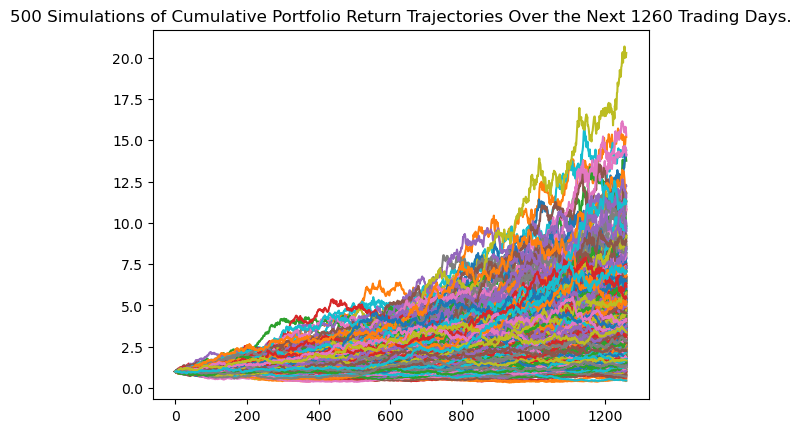

In [14]:
# PLOT THE MONTE CARLO SIMULATION RESULTS:
# To analyze the data that the Monte Carlo simulation generated, we use other built-in functions that the MCSimulation module from MCForecastTools includes.
# First, let's review the 500 samples across the entire simulated time frame (five years) by using the `plot_simulation` function:
# Notice that the second step in this code uses the chained functions `get_figure` and `save_fig`.
# The parameters include the name that we want for the image file and `bbox_inches="tight"`.
# The latter removes all the whit space surounding the notbook visualization from the saved image.
# With these functions, we can save the plot for future use.

# Plot the simulation outcomes:
MC_sim_line_plot = MC_fiveyear.plot_simulation()

# Save the plot for future use:
MC_sim_line_plot.get_figure().savefig('MC_fiveyear_sim_plot.png', bbox_inches='tight')

In [15]:
# ON THE JOB:
# The ability to save a plot for future use is an important feature.
# It means that we can adjust the image size or add any annotations that we need to taillor the plot for a particular report.

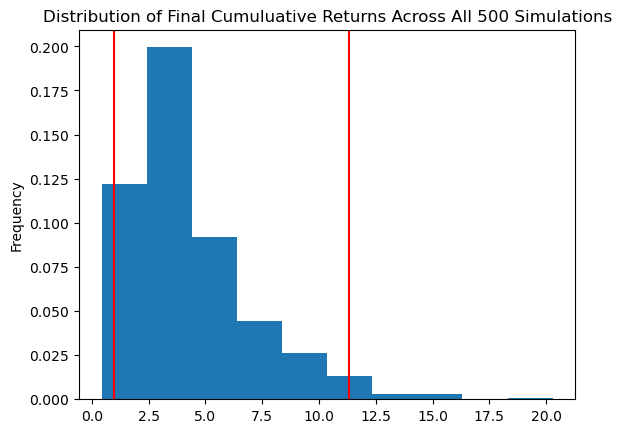

In [16]:
# the overlay line plot shoes the trajectory of each sample across the 1,260 simulated trading days.
# the x-axis shows the trading days nad the y-axis shows the cumulative return of the portfolio.
# A cumulative return value of 1 indicates that no change in the portfolio value occured.
# The plot shows some cumulative return values of 10, 15, even 20 times the original value..
# However, it's difficult to determine the distribution values from this perspective.
# To visualize the distribution of cumulative return values, we'll create a histogram by using the `plot_distribution` function:

# Plot the probability distribution and confidence intervals:
MC_sim_dist_plot = MC_fiveyear.plot_distribution()

# Save the plot for future use:
MC_sim_dist_plot.get_figure().savefig('MC_fiveyear_dist_plot.png')

In [17]:
# This plot visualizes the final cumulative return values for all 500 simulated samples.
# The x-axis represents the final cumulative return values.
# The y-axis represents the frequency of each bin, or how often the simulation calculated each category of cumulative return values.
    # For example, the bin of cumulative return values from 2.5 to 4.8 occurred the most frequently.
# The vertical red lines in the plot visualize the 95% confidence interval.
# The plot indicates with a 95% confidence level, that we can expect a cumulative return of about 1 to 11.5 times the original investment amount.

# REWIND
# The 95% confidence interval illustrates the cumulative returns that we expect to fall within 1.96 standard deviations of the mean.
# We assume that Monte Carlo simulations will display a normal distribution - especially as the number of simulations that we run increase.
# The 95% confidence interval therefore approximates that most of the simulated returns will exist in the center of the bell curve, rather than at the far tail ends.

In [18]:
# GENERATE THE SUMMARY STATISTICS
# We can also display the summary statistics for the Monte Carlo simulation instance by running the MCSimulation function `summarize_cumulative_return:

# Generate summary statistics from the Monte Carlo simulation.
# Set the summary statistics equal to a variable for future use:
MC_summary_stats = MC_fiveyear.summarize_cumulative_return()

# Print summary statistics series:
print(MC_summary_stats)

count           500.000000
mean              4.310457
std               2.743063
min               0.435891
25%               2.469385
50%               3.593010
75%               5.437898
max              20.287603
95% CI Lower      0.975694
95% CI Upper     11.314361
Name: 1260, dtype: float64


C:\Users\legar\Desktop\COMPUTER_SCIENCE\05_FINANCIAL_SIMULATIONS_APIS\L3_future_simulation\MCForecastTools.py:172: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  return metrics.append(ci_series)


In [19]:
# Note that we set the summary statistics equal to a variable.
# This will allow us to access the individual stats in some upcoming calculations.
# Notice the two new statistics that this Series lists: `95% CI Lower` and `95% CI Upper`.
# Given the 95% confidence interval, these values represent the lower and upper bounds of the cumulative performance of the portfolio.
# We can use these values to calculate the range of possible outcomes from a $10,000 investment in Novo Nordisk, NVDIA, and SPY:

# Using the lower and upper 95% confidence intervals from the summary statistics,
# Calculate the range of probable cumulative returns for a $10,000 investment:
ci_95_lower_cum_ret = MC_summary_stats[8] * 10000
ci_95_upper_cum_ret = MC_summary_stats[9] * 10000

# Print the results:
print(f'There is a 95% chance that an initial investment of $10,000 in the portfolio' 
      f' over the next 5 years will yield returns within the range of'
      f' ${ci_95_lower_cum_ret: .2f} and ${ci_95_upper_cum_ret: .2f}.')

There is a 95% chance that an initial investment of $10,000 in the portfolio over the next 5 years will yield returns within the range of $ 9756.94 and $ 113143.61.


In [21]:
# By indexing the summary statistics, this calculation code gives us the lower and upper bound return value of an investment of $10,000.
# The five-year forecast simulates more variability than the data that the simulation is based on includes.
# In general, it's ideal to supply one year of historical data for each year of simulated data.
# If we simulate using only small amounts of data during a recent time when markets are booming, or falling precipitously, a Monte Carlo Analysis will inadvertedly extrapolate this temporary market movement too far into the future..
# Getting data over a longer time period mitigates this effect.
# Due to limitations of the Alpaca API, however, we can typically produce just three full years of historical data.

In [22]:
# ADJUST THE SIMULATION PARAMETERS
# With a few tweaks to our simulation code, we can use the Monte Carlo sim tool not just to forecast, but also to optimize the performance of our investment.
# Our simulation specified a 20/40/40 split between the weights of NVO, NVDA, and SPY stock.
# How will the forcast for our portfolio change if we adjust the split to 10/20/70 or 20/60/20?
# By changing the weight of each stock and rerunning the simulation, we can determine which investment split has the greates potential for generating the largest returns.
# This process is called PORTFOLIO OPTIMIZATION.
# We can also use the Monte Carlo simulations to forecast the performance of more sizable portfolios.
# Alpaca gives us access to historical price data for all kinds of assets.
# And if we can access the data, we can run the simulation.

In [ ]:
# ON THE JOB
# Portfolio performance forecasting, using tools like Monte Carlo simulations, is the basis of retirement planning across the FinTech industry.
# A wealth manager uses the forcasting tools that their firm supplies to evaluate a client's portfolio and make predictions about the value of that portfolio in the future.
# These predictions help steer the client's future regarding investments and spending.
# The wealth manager can also make suggestions about the weights of the assets across the portfolio to meet the client's future spending expectations.
# This is called PORTFOLIO CONSTRUCTION.